# Ecuaciones Diferenciales con Transformada de Laplace

In [2]:
import numpy as np

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import symbols, laplace_transform
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'

In [4]:
import sympy
sympy.init_printing()

In [5]:
from scipy import integrate

In [6]:
t = sympy.symbols("t", positive=True) #Definimos cada una de las varaibles como terminos algebraicos haciendo que t sea un numero positivo

In [7]:
s, Y = sympy.symbols("s Y", complex=True) #hacemos que s & Y sean valores reales

In [8]:
y = sympy.Function("y") #Hacemos que "y" sea una función en terminos de las anteriores variables

In [9]:
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t) #Comando para ED

In [10]:
ode

                                      2      
                         d           d       
10⋅y(t) - 2⋅sin(3⋅t) + 2⋅──(y(t)) + ───(y(t))
                         dt           2      
                                    dt       

In [11]:
L_y = sympy.laplace_transform(y(t), t, s) #Aplicamos su transformada de Laplace

In [12]:
L_y

(LaplaceTransform(y(t), t, s), -∞, True)

In [13]:
#L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
L_ode= sympy.laplace_transform(ode, t, s)

In [14]:
L_ode

⎛ 2                                                                           
⎜s ⋅LaplaceTransform(y(t), t, s) + 2⋅s⋅LaplaceTransform(y(t), t, s) - s⋅y(0) +
⎜                                                                             
⎝                                                                             

                                            ⎛d       ⎞│        6            ⎞
 10⋅LaplaceTransform(y(t), t, s) - 2⋅y(0) - ⎜──(y(t))⎟│    - ──────, 0, True⎟
                                            ⎝dt      ⎠│t=0    2             ⎟
                                                             s  + 9         ⎠

### **Documentación**

Los codigos anteriores utilizan la función `sympy.laplace_transform` de **SymPy** para calcular la **transformada de Laplace**, pero operan sobre diferentes expresiones matemáticas.




### Código 1:
```python
L_y = sympy.laplace_transform(y(t), t, s)
```

#### Explicación:
- **Entrada**:
  - `y(t)`: Es una función simbólica dependiente de \( t \), como \( y(t) \).
  - `t`: La variable independiente del tiempo en \( y(t) \).
  - `s`: La variable del dominio de Laplace.

- **Salida**:
  - Calcula la transformada de Laplace de la función \( y(t) \), que está definida como:
    \[
    \mathcal{L}\{y(t)\}(s) = \int_0^\infty y(t) e^{-st} dt
    \]

- **Propósito**:
  - Este código se centra en obtener la transformada de Laplace de una **función específica**, como una entrada oda de un sistema.

---

### Código 2:
```python
L_ode = sympy.laplace_transform(ode, t, s)
```

#### Explicación:
- **Entrada**:
  - `ode`: Una ecuación diferencial simbólica en términos de \( y(t) \) y sus derivadas, como:
    \[
    \text{ode} = y''(t) + 2y'(t) + y(t) = f(t)
    \]
  - `t`: La variable independiente del tiempo.
  - `s`nde \( Y(s) \) es la transformada de \( y(t) \).

- **Propósito**:
  - Este código es útil para resolver **ecuaciones diferenciales** en el dominio de Laplace a_ode)
```
**Salida**:
Transforma cada término de la ecuación diferencial al dominio \( s \).


In [18]:
def laplace_transform_derivatives(e):
    """
    Evaluate the laplace transforms of derivatives of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

### **Documentación**

La función anterior está diseñada para manejar y evaluar la  transformada de Laplacede derivadas simbólicas en expresiones dadas.



### Propósito:
La función aplica las propiedades de la transformada de Laplace a derivadas simbólicas dentro de una expresión. Recordemos que la transformada de Laplace de la \( n \)-ésima derivada de \( f(t) \) está dada por:

\[
\mathcal{L}\{f^{(n)}(t)\} = s^n \mathcal{L}\{f(t)\} - \sum_{k=0}^{n-1} s^{n-k-1} f^{(k)}(0)
\]

Donde \( f^{(k)}(0) \) son los valores iniciales de las derivadas hasta el orden \( n-1 \). La función implementa este resultado de forma simbólica.

---

### Análisis del código:

#### 1. **Manejo de transformadas de derivadas**:
```python
if isinstance(e, sympy.LaplaceTransform):
    if isinstance(e.args[0], sympy.Derivative):
        d, t, s = e.args
        n = d.args[1][1]
        return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                     for i in range(1, n+1)]))
```

- **`sympy.LaplaceTransform`**:
  - Detecta si el término actual es una transformada de Laplace (`e` es una instancia de `sympy.LaplaceTransform`).
  
- **`sympy.Derivative`**:
  - Comprueba si el argumento dentro de la transformada (\( e.args[0] \)) es una derivada simbólica.
  
- **Transformada de la derivada**:
  - Si es una derivada \( f^{(n)}(t) \):
    - `n = d.args[1][1]`: Obtiene el orden \( n \) de la derivada.
    - Calcula:
      \[
      s^n \mathcal{L}\{f(t)\} - \sum_{i=1}^n s^{n-i} f^{(i-1)}(0)
      \]
      Usando:
      - `sympy.diff(d.args[0], t, i-1)`: Calcula la derivada simbólica de \( f(t) \).
      - `.subs(t, 0)`: Evalúa cada derivada inicial en \( t = 0 \).

#### 2. **Manejo de expresiones algebraicas**:
```python
if isinstance(e, (sympy.Add, sympy.Mul)):
    t = type(e)
    return t(*[laplace_transform_derivatives(arg) for arg in e.args])
```

- Si la expresión es una suma (`sympy.Add`) o un producto (`sympy.Mul`):
  - Aplica `laplace_transform_derivatives` recursivamente a cada término (\( e.args \)).
  - Reconstruye la expresión con la misma operación (suma o producto).

#### 3. **Otros casos**:
```python
return e
```

- Si el término no es una transformada de Laplace o esolver ecuaciones diferenciales en el dominio de Laplace aplicando propiedades de las derivadas.


In [22]:
L_ode

⎛ 2                                                                           
⎜s ⋅LaplaceTransform(y(t), t, s) + 2⋅s⋅LaplaceTransform(y(t), t, s) - s⋅y(0) +
⎜                                                                             
⎝                                                                             

                                            ⎛d       ⎞│        6            ⎞
 10⋅LaplaceTransform(y(t), t, s) - 2⋅y(0) - ⎜──(y(t))⎟│    - ──────, 0, True⎟
                                            ⎝dt      ⎠│t=0    2             ⎟
                                                             s  + 9         ⎠

In [32]:
# Obtener la expresión de la transformada de Laplace (el primer elemento del resultado)
L_y_expr = L_y[0]  # El primer elemento de la tupla devuelta por LaplaceTransform

# Ahora sustituimos L_y_expr por Y en la ecuación
L_ode_3 = L_ode[0].subs(L_y_expr, Y)

In [34]:
#L_ode_2 = laplace_transform_derivatives(L_ode)

In [36]:
#L_ode_2

In [38]:
#L_ode_3 = L_ode_2[0].subs(L_y, Y) #Comando para acceder al 1er elemento de la tupla y sustiyuye el valor algebraico L_y por Y

In [40]:
L_ode_3

   2                                    ⎛d       ⎞│        6   
Y⋅s  + 2⋅Y⋅s + 10⋅Y - s⋅y(0) - 2⋅y(0) - ⎜──(y(t))⎟│    - ──────
                                        ⎝dt      ⎠│t=0    2    
                                                         s  + 9

In [42]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0} #COmando para agregar condiciiones iniciales

In [44]:
ics

⎧         ⎛d       ⎞│      ⎫
⎨y(0): 1, ⎜──(y(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [46]:
L_ode_4 = L_ode_3.subs(ics) #Sustituye los valores iniciales en la ED L_ode_3

In [48]:
L_ode_4

   2                            6   
Y⋅s  + 2⋅Y⋅s + 10⋅Y - s - 2 - ──────
                               2    
                              s  + 9

In [50]:
Y_sol = sympy.solve(L_ode_4,Y)

In [52]:
Y_sol #Muesta la solución a la ED, sin embargo cuando aparece un cuadrito significa que la ED no tiene solución por este metodo

⎡      3      2               ⎤
⎢     s  + 2⋅s  + 9⋅s + 24    ⎥
⎢─────────────────────────────⎥
⎢ 4      3       2            ⎥
⎣s  + 2⋅s  + 19⋅s  + 18⋅s + 90⎦

In [54]:
solu=sympy.apart(Y_sol)

In [56]:
solu

⎡  6⋅(2⋅s - 1)       49⋅s + 92     ⎤
⎢- ─────────── + ──────────────────⎥
⎢     ⎛ 2    ⎞      ⎛ 2           ⎞⎥
⎣  37⋅⎝s  + 9⎠   37⋅⎝s  + 2⋅s + 10⎠⎦

In [58]:
y_sol = sympy.inverse_laplace_transform(solu[0], s, t)

In [60]:
y_sol

                               -t                -t         
2⋅sin(3⋅t)   12⋅cos(3⋅t)   43⋅ℯ  ⋅sin(3⋅t)   49⋅ℯ  ⋅cos(3⋅t)
────────── - ─────────── + ─────────────── + ───────────────
    37            37             111                37      

In [62]:
sympy.simplify(y_sol) #Simplifico mejor la solución

⎛                           t                             ⎞  -t
⎝6⋅(sin(3⋅t) - 6⋅cos(3⋅t))⋅ℯ  + 43⋅sin(3⋅t) + 147⋅cos(3⋅t)⎠⋅ℯ  
───────────────────────────────────────────────────────────────
                              111                              

In [64]:
sympy.simplify(y_sol).evalf()

                    ⎛                               t                         
0.00900900900900901⋅⎝6.0⋅(sin(3⋅t) - 6.0⋅cos(3⋅t))⋅ℯ  + 43.0⋅sin(3⋅t) + 147.0⋅

        ⎞  -t
cos(3⋅t)⎠⋅ℯ  

### **Documentación**

El código `sympy.simplify(y_sol).evalf()` realiza dos acciones principales sobre la expresión `y_sol`:

1. **`sympy.simplify(y_sol)`**:
   - Intenta simplificar la expresión simbólica `y_sol` para reducirla a una forma más compacta o más fácil de interpretar.  
   - Esto puede incluir combinar términos similares, factorizar, expandir, eliminar denominadores comunes, etc.  
   - **Ejemplo:**
     ```python
     from sympy import simplify, symbols
     x = symbols('x')
     expr = (x**2 + 2*x + 1) / (x + 1)
     print(simplify(expr))  # Resultado: x + 1
     ```

2. **`.evalf()`**:
   - Evalúa la expresión simbólica en forma numérica, es decir, aproxima los valores exactos a números decimales flotantes con cierta precisión.  
   - Se utiliza cuando necesitas resultados numéricos en lugar de valores simbólicos.  
   - **Ejemplo:**
     ```python
     from sympy import symbols, pi
     print(pi.evalf())  # Resultado: 3.1415to claridad como precisión numérica en los resultados.

In [67]:
y_t = sympy.lambdify(t, y_sol.evalf(), 'numpy')

In [69]:
y_t

<function _lambdifygenerated(t)>

### **Documentación**
La función `` y_t = sympy.lambdify(t, y_sol.evalf(), 'numpy') ``
Crea una función de Python que depende de la variable t.
Toma la expresión simbólica y la convierte en una función utilizable para cálculos numéricos.

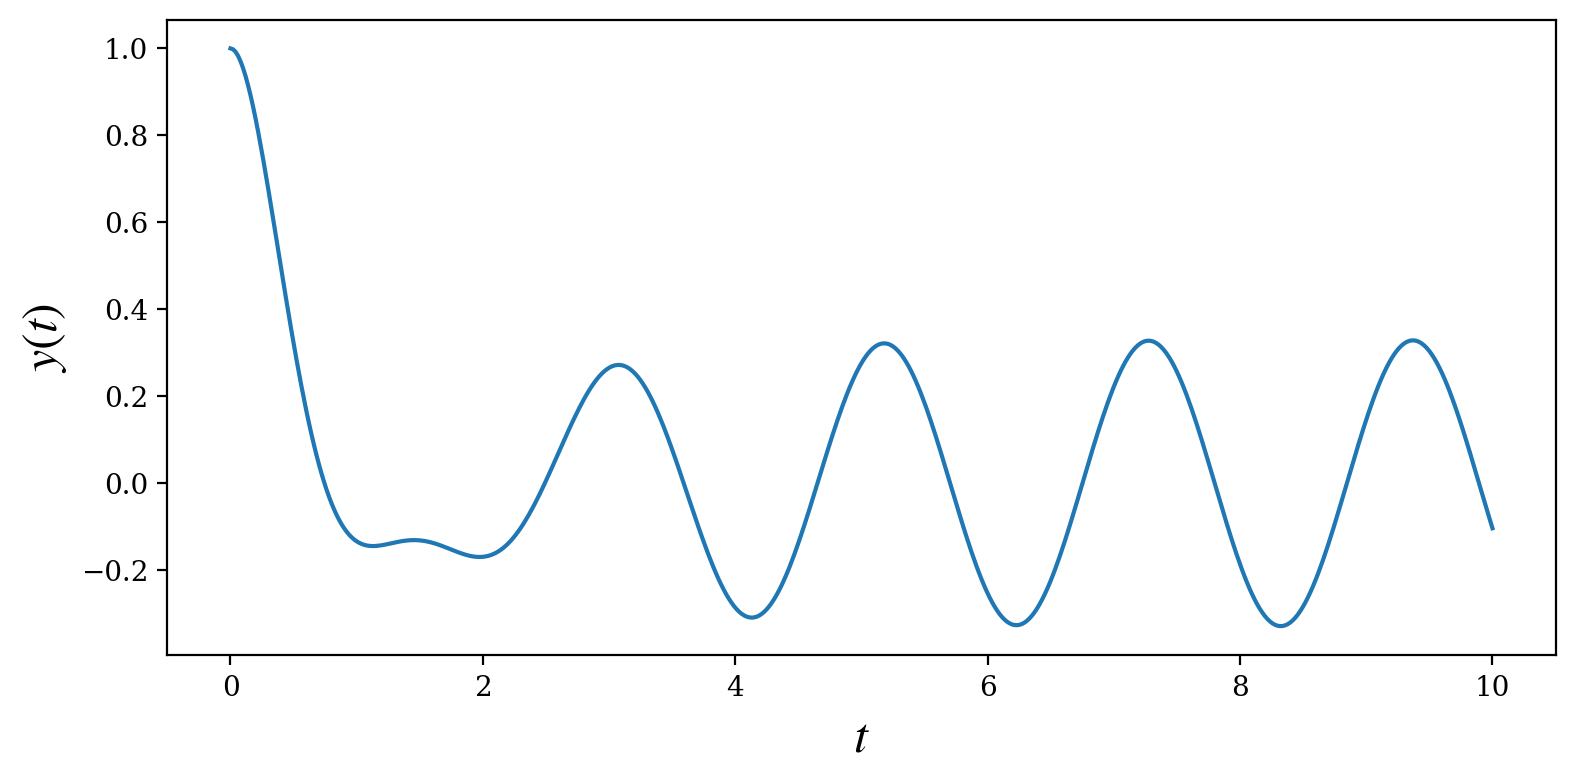

In [80]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("text", usetex=False)  # Desactiva el uso de LaTeX

fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 10, 500)
ax.plot(tt, y_t(tt).real)
ax.set_xlabel(r"$t$", fontsize=18)  # Todavía puedes usar texto matemático, pero sin LaTeX
ax.set_ylabel(r"$y(t)$", fontsize=18)
fig.tight_layout()
plt.show()


In [74]:
%version_information numpy, scipy, sympy, matplotlib

UsageError: Line magic function `%version_information` not found.
